First import all modules needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

bring in excel

In [3]:
df = pd.read_excel('DllData.xlsx', sheet_name='Raw Data')
print(df.head())
df.shape

   Unique Identifier             DLL Business Unit Application Value  \
0     12300000000000  Constr. Transp. & Industrial         497450.48   
1     12300000000001  Constr. Transp. & Industrial             62616   
2     12300000000002                   Food & Agri           37054.8   
3     12300000000003                   Food & Agri             36000   
4     12300000000004                   Food & Agri             63500   

  Credit Application Received Date/Time Credit Application Decision Date/Time  \
0                   2021-12-14 11:09:00                   2021-10-27 23:00:00   
1                   2021-12-06 10:56:00                   2021-12-15 16:46:00   
2                   2021-11-09 14:36:00                   2021-11-16 15:26:00   
3                   2021-12-07 11:11:00                   2021-12-07 13:58:00   
4                   2021-12-16 22:00:00                   2021-12-17 17:20:00   

  Contract Received in Operations Date/Time  \
0                       2021-12-2

(11347, 7)

clean data

In [15]:
df.dropna()
df = df.rename(columns={"DLL Business Unit":"DLL_Business_Unit", "Application Value":"Application_Value"})

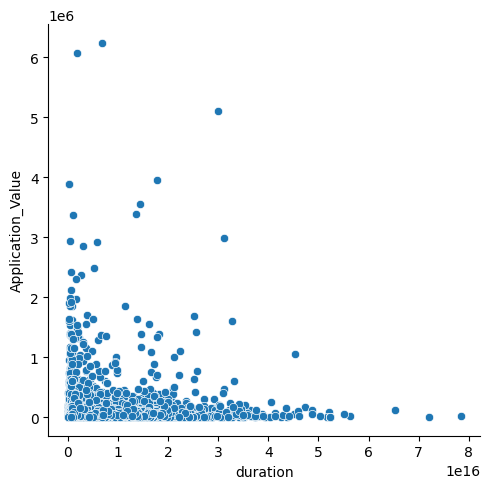

In [17]:
df = df[pd.to_numeric(df['Application_Value'], errors='coerce').notnull()]
df['duration'] = df['Contract Ready for Payment Date/Time'] - df['Credit Application Received Date/Time']
df.head()
sns.relplot(data=df, y='Application_Value', x='duration')
plt.show()

find means

In [18]:
# Select the column of interest
column_names = ['duration','Application_Value']
for columns in column_names:
    column = df[columns]

    print(columns)

    # Calculate the mean
    mean = column.mean()
    print("Mean:", mean)

    # Calculate the median
    median = column.median()
    print("Median:", median)

    # Calculate the standard deviation
    std_dev = column.std()
    print("Standard deviation:", std_dev)

duration
Mean: 44 days 18:54:04.123511248
Median: 18 days 21:20:00
Standard deviation: 67 days 13:15:02.434165004
Application_Value
Mean: 65515.27139001616
Median: 28890.03
Standard deviation: 193795.40634106245


large differnce between mean and median suggest alot of out lires or large outlires

['Constr. Transp. & Industrial' 'Food & Agri' 'Healthcare'
 'Office Technology']
Constr. Transp. & Industrial
Mean :  £101680
median :  £45000
Food & Agri
Mean :  £40844
median :  £28000
Healthcare
Mean :  £106511
median :  £25945
Office Technology
Mean :  £68630
median :  £9758


,Unique Identifier,DLL_Business_Unit,Application_Value,Credit Application Received Date/Time,Credit Application Decision Date/Time,Contract Received in Operations Date/Time,Contract Ready for Payment Date/Time,duration


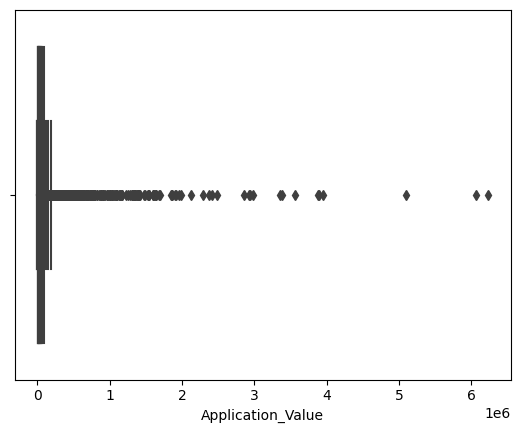

In [23]:
unique_values = df['DLL_Business_Unit'].unique()
print(unique_values)

for value in unique_values:
    print(value)
    filtered_df = df[df['DLL_Business_Unit'].str.contains(value)]
    filtered_df.head()
    column_mean = filtered_df["Application_Value"].mean()
    print(f"Mean :  £{round(column_mean)}")
    column_median = filtered_df["Application_Value"].median()
    print(f"median :  £{round(column_median)}")
    sns.boxplot(x=filtered_df["Application_Value"])


# filtered_df = df[df.eq('Constr. Transp. & Industrial'
# ).any(axis=1)]
# filtered_df.head()
df.loc[df.Application_Value=='Food & Agri']